
# Case 2. Тарифы телекоммуникационного провайдера

Абонент хочет оптимизировать свои затраты на связь, сменив текущий тарифный план. Три оператора сотовой связи прислали свои предложения: описание всех тарифных планов агрегированы в единый документ. Имеется также выгрузка исходящих вызовов абонента за последние 6 месяцев.

Необходимо исследовать характер исходящих звонков абонента и предложить оптимальный тариф, обосновав свои рекомендации аналитическими расчетами.

Примечание: начать исследование рекомендуется с описания начального набора данных.


In [454]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1) Загрузка данных

In [412]:
d = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\case_studies_da\\2. Telecom\\telecom_data.xlsx",
                  engine='openpyxl', parse_dates=[0])
d.head(10)

,Дата звонка,Длительность разговора,Оператор связи вызываемого абонента
0,2010-12-15 10:50:54,00:01:49,билайн
1,2010-12-15 11:50:42,00:00:57,билайн
2,2010-11-30 16:39:34,00:00:55,билайн
3,2010-11-30 16:39:34,00:00:55,билайн
4,2010-01-12 09:49:09,00:06:47,билайн
5,2010-01-12 14:01:02,00:01:14,билайн
6,2010-02-12 11:28:55,00:00:38,билайн
7,2010-02-12 11:40:47,00:00:31,билайн
8,2010-02-12 11:51:17,00:00:11,билайн
9,2010-02-12 12:00:16,00:00:45,билайн


In [413]:
d.columns

Index(['Дата звонка', 'Длительность разговора',
       'Оператор связи вызываемого абонента'],
      dtype='object')

In [414]:
# переименование колонок
d = d.rename(columns={'Дата звонка': 'date',
                      'Длительность разговора': 'duration',
                      'Оператор связи вызываемого абонента': 'operator'})
d

,date,duration,operator
0,2010-12-15 10:50:54,00:01:49,билайн
1,2010-12-15 11:50:42,00:00:57,билайн
2,2010-11-30 16:39:34,00:00:55,билайн
3,2010-11-30 16:39:34,00:00:55,билайн
4,2010-01-12 09:49:09,00:06:47,билайн
...,...,...,...
1225,2010-12-16 15:20:12,00:00:26,яртелеком
1226,2010-12-16 16:30:41,00:01:35,яртелеком
1227,2010-12-14 18:11:18,00:00:08,яртелеком
1228,2010-12-14 18:11:56,00:00:45,яртелеком


In [467]:
# провека на пропущенные значения
pd.DataFrame(round(d.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
duration,0.000000
operator,0.000000


## 2) Обработка временного ряда, создание новых признаков

In [416]:
def convert_duration(duration_str):
    hours, minutes, seconds = map(int, duration_str.split(":"))
    total_seconds = hours * 60 + minutes * 60 + seconds
    return total_seconds

In [417]:
d['duration'] = d['duration'].apply(convert_duration)
d

,date,duration,operator
0,2010-12-15 10:50:54,109,билайн
1,2010-12-15 11:50:42,57,билайн
2,2010-11-30 16:39:34,55,билайн
3,2010-11-30 16:39:34,55,билайн
4,2010-01-12 09:49:09,407,билайн
...,...,...,...
1225,2010-12-16 15:20:12,26,яртелеком
1226,2010-12-16 16:30:41,95,яртелеком
1227,2010-12-14 18:11:18,8,яртелеком
1228,2010-12-14 18:11:56,45,яртелеком


In [418]:
data = d.copy()

In [419]:
data['date_only'] = pd.to_datetime(data['date']).dt.date
data

,date,duration,operator,date_only
0,2010-12-15 10:50:54,109,билайн,2010-12-15
1,2010-12-15 11:50:42,57,билайн,2010-12-15
2,2010-11-30 16:39:34,55,билайн,2010-11-30
3,2010-11-30 16:39:34,55,билайн,2010-11-30
4,2010-01-12 09:49:09,407,билайн,2010-01-12
...,...,...,...,...
1225,2010-12-16 15:20:12,26,яртелеком,2010-12-16
1226,2010-12-16 16:30:41,95,яртелеком,2010-12-16
1227,2010-12-14 18:11:18,8,яртелеком,2010-12-14
1228,2010-12-14 18:11:56,45,яртелеком,2010-12-14


In [420]:
data = data.drop(columns='date')
data

,duration,operator,date_only
0,109,билайн,2010-12-15
1,57,билайн,2010-12-15
2,55,билайн,2010-11-30
3,55,билайн,2010-11-30
4,407,билайн,2010-01-12
...,...,...,...
1225,26,яртелеком,2010-12-16
1226,95,яртелеком,2010-12-16
1227,8,яртелеком,2010-12-14
1228,45,яртелеком,2010-12-14


In [421]:
# checking if index is now correct
data.index.is_monotonic_increasing

True

In [422]:
df = data[['date_only', 'duration', 'operator']]
df.head(20)

,date_only,duration,operator
0,2010-12-15,109,билайн
1,2010-12-15,57,билайн
2,2010-11-30,55,билайн
3,2010-11-30,55,билайн
4,2010-01-12,407,билайн
5,2010-01-12,74,билайн
6,2010-02-12,38,билайн
7,2010-02-12,31,билайн
8,2010-02-12,11,билайн
9,2010-02-12,45,билайн


In [424]:
df.columns

Index(['date_only', 'duration', 'operator'], dtype='object')

In [425]:
# assuming your date_only column is already in datetime format
# if not, convert it using pd.to_datetime(df['date_only'], format='%Y-%m-%d')
df['date_only'] = pd.to_datetime(data['date_only'], format='%Y-%m-%d')

df

,date_only,duration,operator
0,2010-12-15,109,билайн
1,2010-12-15,57,билайн
2,2010-11-30,55,билайн
3,2010-11-30,55,билайн
4,2010-01-12,407,билайн
...,...,...,...
1225,2010-12-16,26,яртелеком
1226,2010-12-16,95,яртелеком
1227,2010-12-14,8,яртелеком
1228,2010-12-14,45,яртелеком


In [426]:
resampled = df.groupby(['operator', pd.Grouper(key='date_only', freq='1M')])['duration'].sum().reset_index()

resampled

,operator,date_only,duration
0,билайн,2010-01-31,1679
1,билайн,2010-02-28,907
2,билайн,2010-03-31,195
3,билайн,2010-04-30,244
4,билайн,2010-05-31,255
...,...,...,...
59,яртелеком,2010-07-31,33
60,яртелеком,2010-08-31,21
61,яртелеком,2010-09-30,6
62,яртелеком,2010-10-31,37


In [427]:
def make_features(data, column):
    # convert index to datetime
    data.index = pd.to_datetime(data[column])

    # creating new features
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day

    return data

In [428]:
data_features = make_features(resampled, 'date_only')
data_features

,operator,date_only,duration,year,month,day
date_only,,,,,,
2010-01-31,билайн,2010-01-31,1679,2010,1,31
2010-02-28,билайн,2010-02-28,907,2010,2,28
2010-03-31,билайн,2010-03-31,195,2010,3,31
2010-04-30,билайн,2010-04-30,244,2010,4,30
2010-05-31,билайн,2010-05-31,255,2010,5,31
...,...,...,...,...,...,...
2010-07-31,яртелеком,2010-07-31,33,2010,7,31
2010-08-31,яртелеком,2010-08-31,21,2010,8,31
2010-09-30,яртелеком,2010-09-30,6,2010,9,30


## 3) Анализ данных

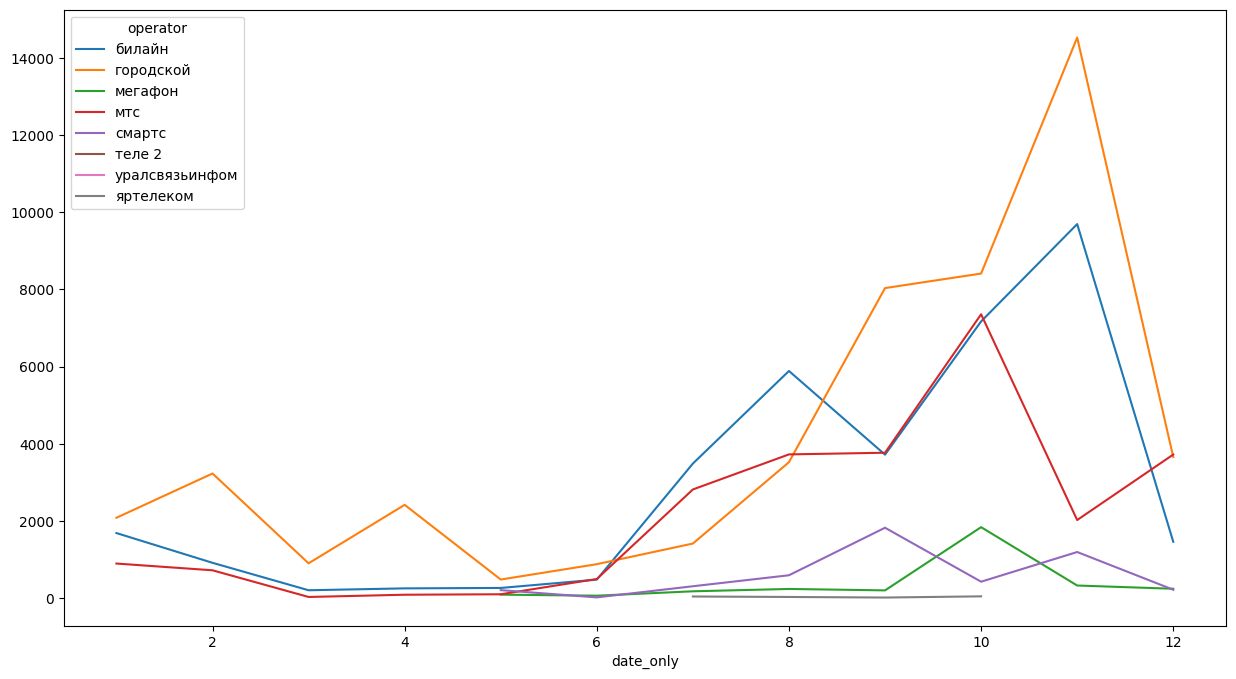

In [423]:
# Convert the 'date_only' column to a Pandas DatetimeIndex
# Convert the 'date_only' column to a Pandas DatetimeIndex
df['date_only'] = pd.to_datetime(df['date_only'])

# Group the data by month and operator, and compute the mean duration for each group
monthly_data = df.groupby([df['date_only'].dt.month, 'operator'])['duration'].sum()

# Unstack the data to create a separate line for each operator
monthly_data = monthly_data.unstack()

# Plot the data
monthly_data.plot(figsize=(15, 8));

In [429]:
data_features.columns

Index(['operator', 'date_only', 'duration', 'year', 'month', 'day'], dtype='object')

In [430]:
d_new = data_features[['date_only', 'year', 'month', 'day', 'operator', 'duration']]
d_new

,date_only,year,month,day,operator,duration
date_only,,,,,,
2010-01-31,2010-01-31,2010,1,31,билайн,1679
2010-02-28,2010-02-28,2010,2,28,билайн,907
2010-03-31,2010-03-31,2010,3,31,билайн,195
2010-04-30,2010-04-30,2010,4,30,билайн,244
2010-05-31,2010-05-31,2010,5,31,билайн,255
...,...,...,...,...,...,...
2010-07-31,2010-07-31,2010,7,31,яртелеком,33
2010-08-31,2010-08-31,2010,8,31,яртелеком,21
2010-09-30,2010-09-30,2010,9,30,яртелеком,6


In [431]:
d_new.columns

Index(['date_only', 'year', 'month', 'day', 'operator', 'duration'], dtype='object')

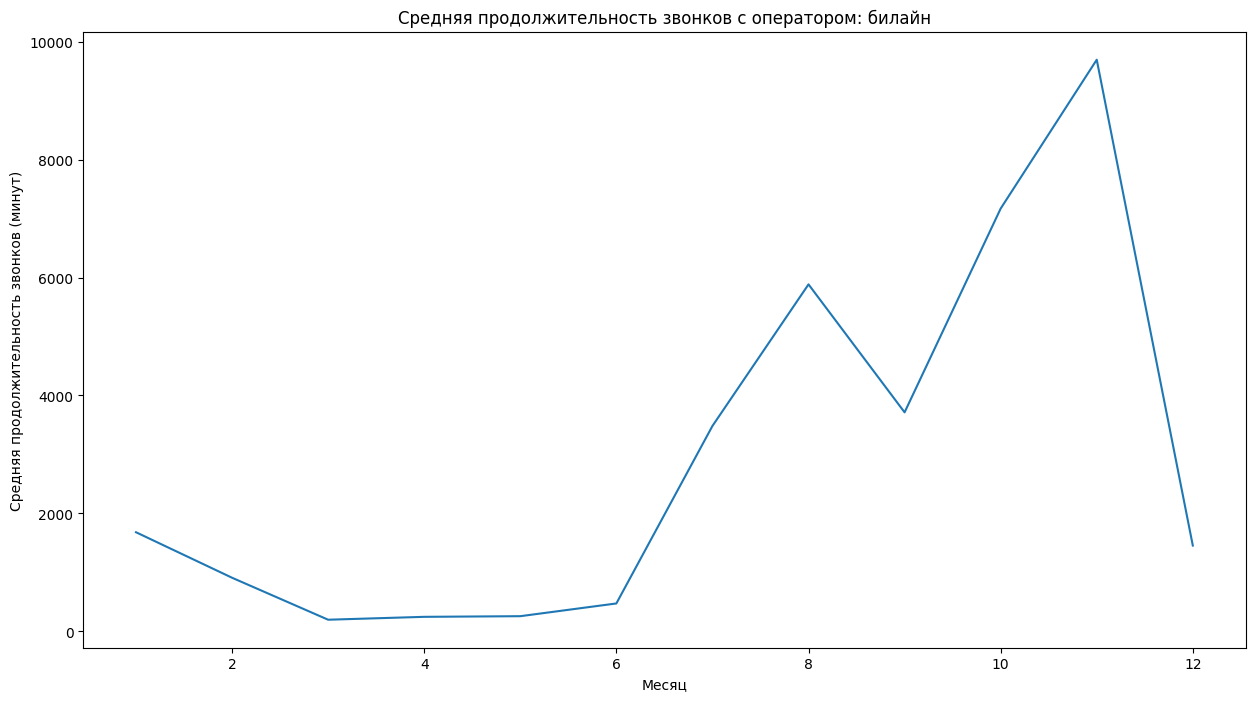

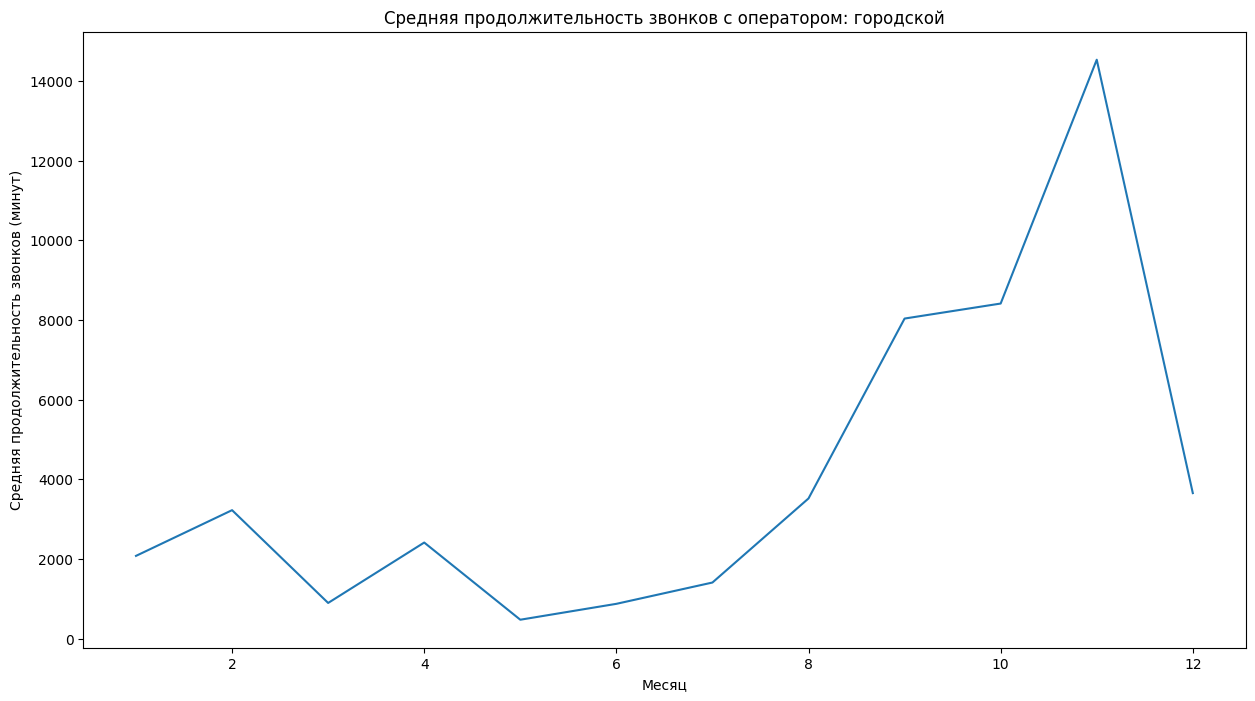

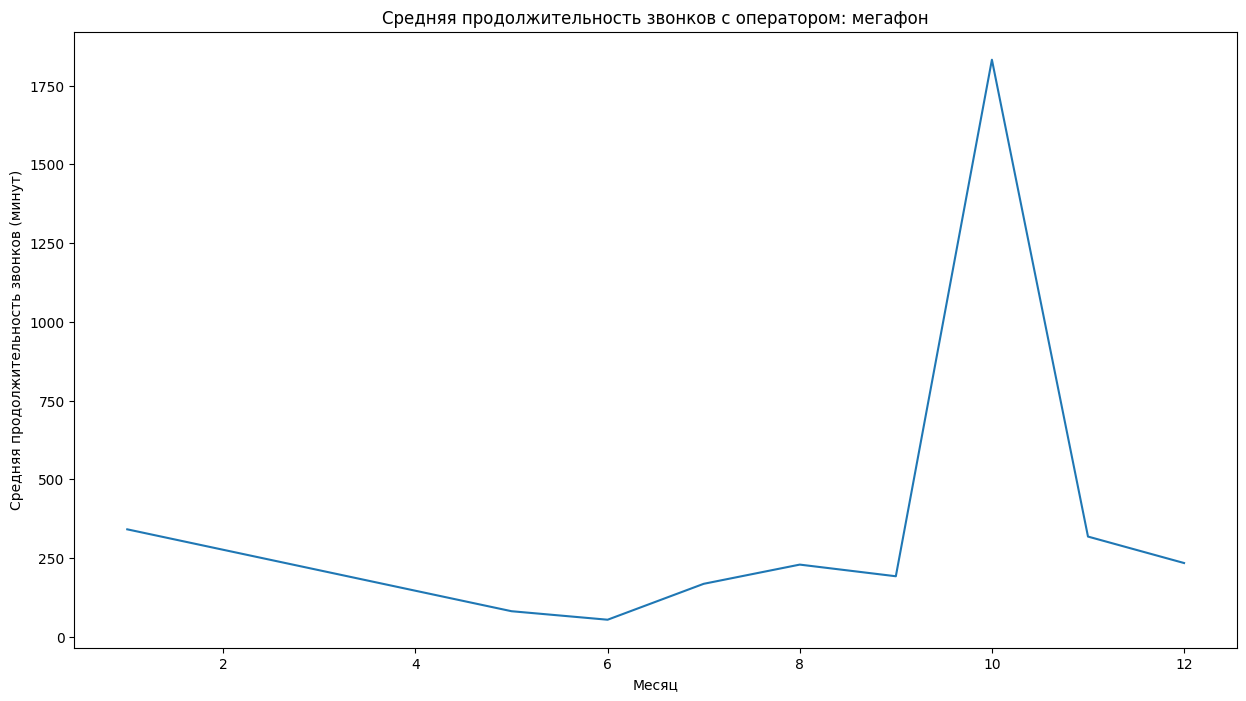

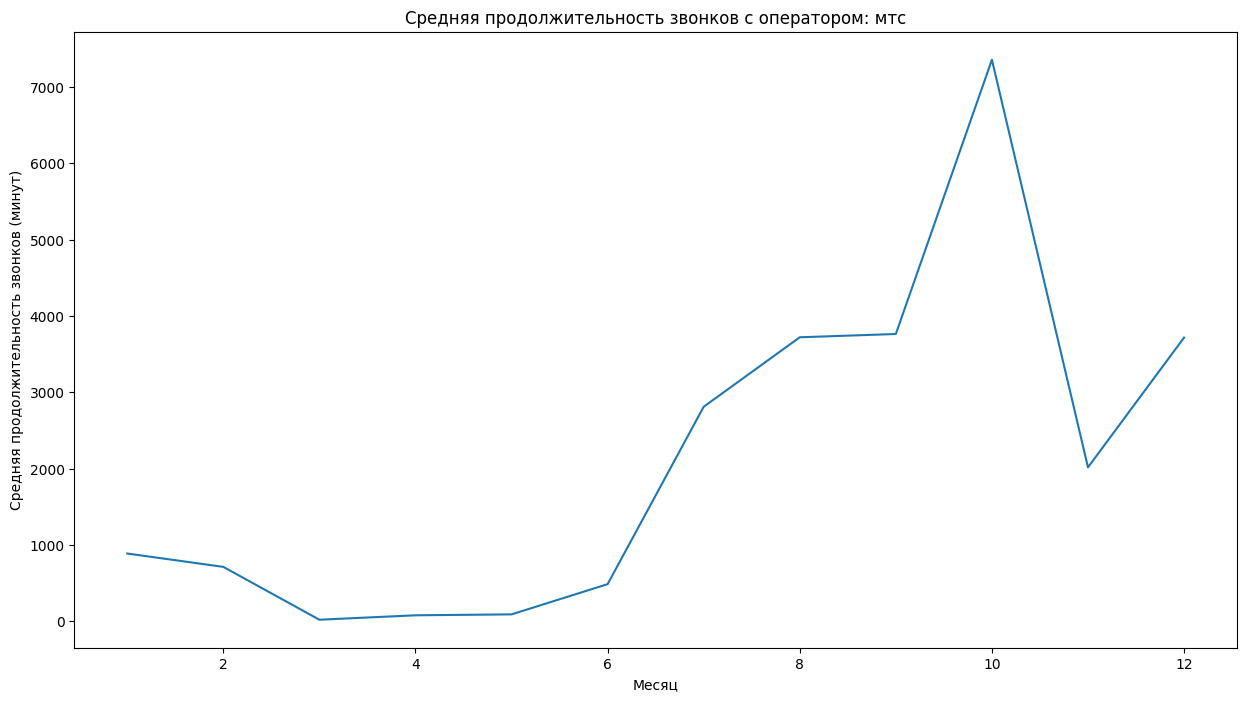

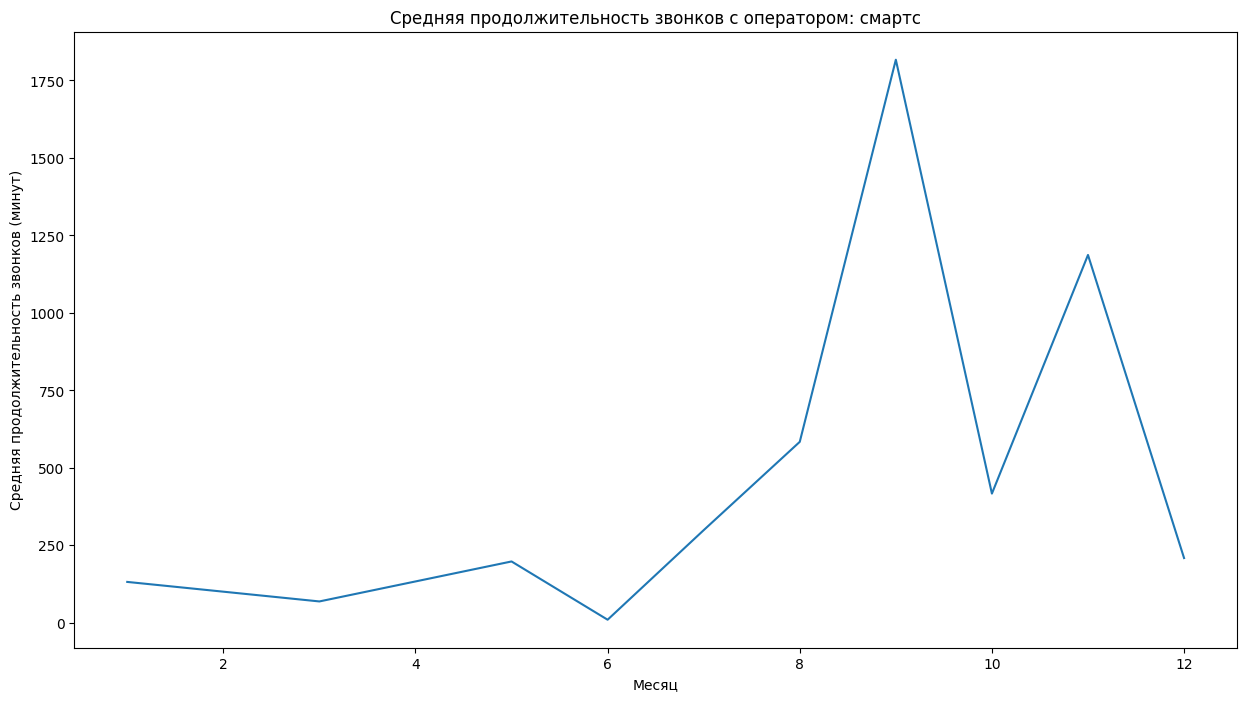

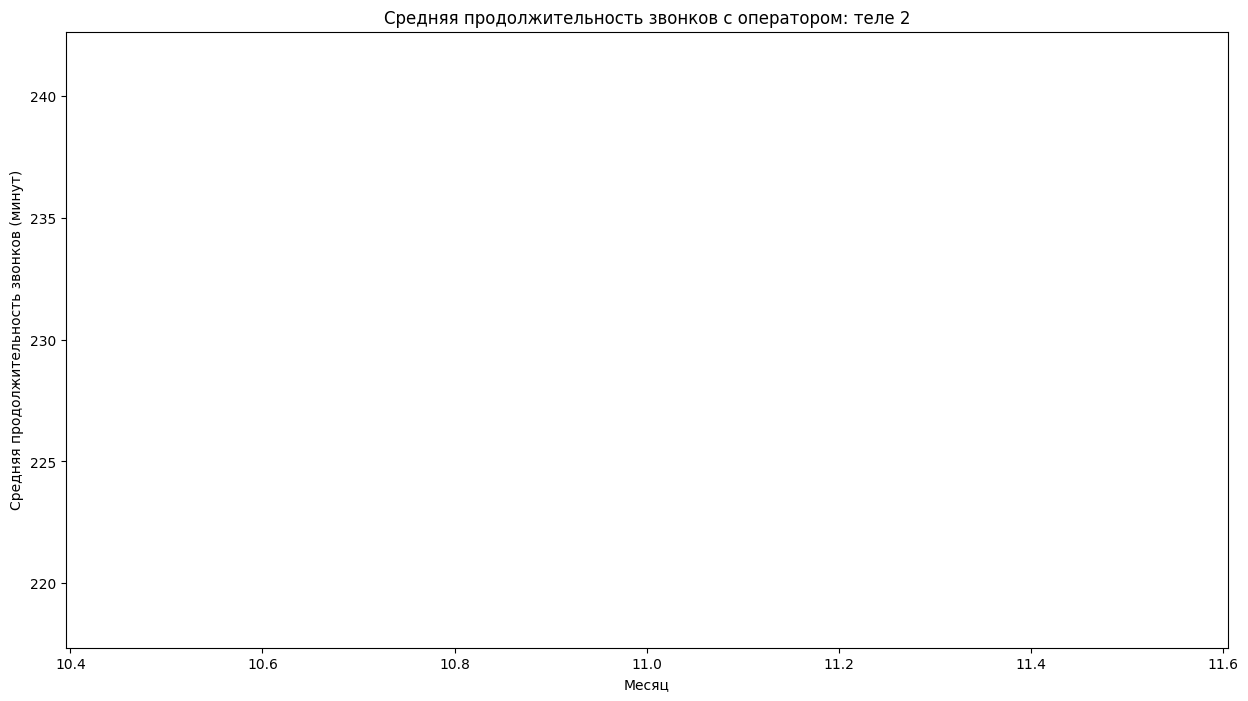

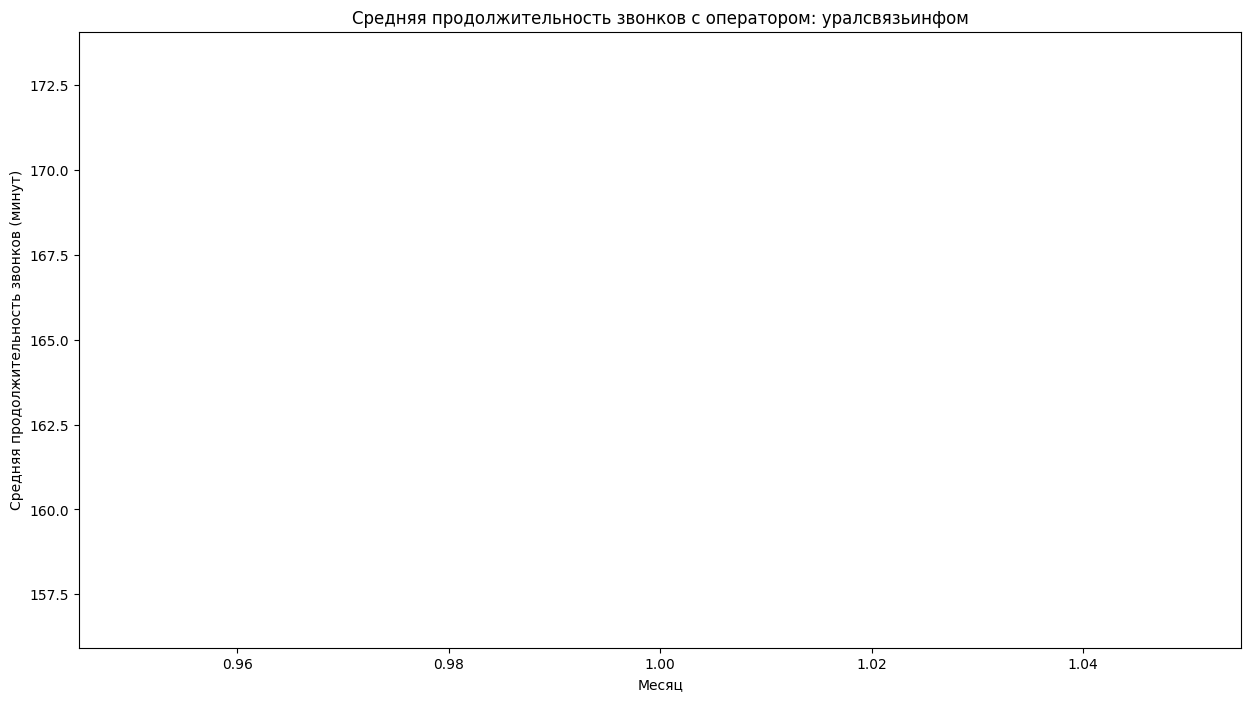

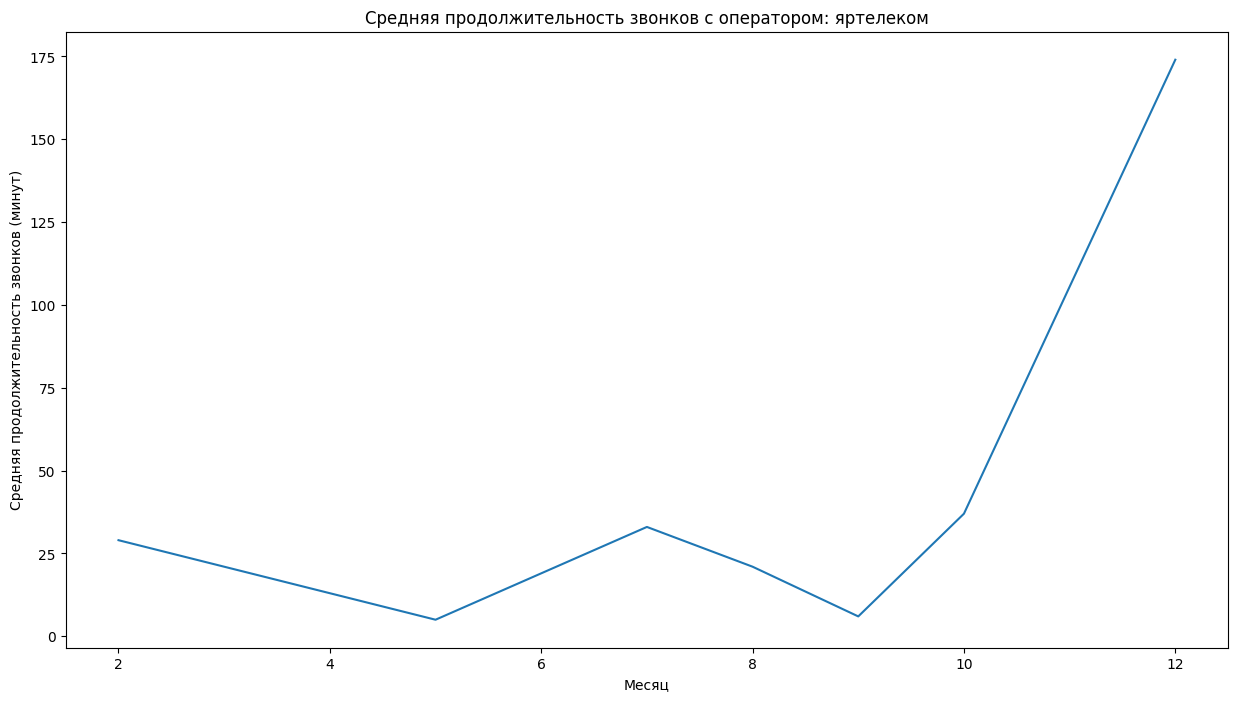

In [443]:
# group the data by operator and month and calculate the mean duration for each combination
monthly_data = d_new.groupby(['operator', 'month'])['duration'].sum()

# iterate over each operator and plot their duration over time
for operator in monthly_data.index.levels[0]:
    plt.figure(figsize=(15, 8))  # set the figsize for each plot
    operator_data = monthly_data[operator]
    plt.plot(operator_data.index, operator_data.values, label=operator)

    # set labels and title for each subplot
    plt.xlabel('Месяц')
    plt.ylabel('Средняя продолжительность звонков (минут)')
    plt.title(f'Средняя продолжительность звонков с оператором: {operator}')

    # show the plot for each operator
    plt.show();

In [433]:
d_new['operator'].unique()

array(['билайн', 'городской', 'мегафон', 'мтс', 'смартс', 'теле 2',
       'уралсвязьинфом', 'яртелеком'], dtype=object)

In [434]:
# select rows for 'теле 2', 'уралсвязьинфом'
subset_df = df[df['operator'].isin(['теле 2', 'уралсвязьинфом'])]

# check data type of 'duration' column
print(subset_df['duration'].dtype)

int64


In [435]:
d_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2010-01-31 to 2010-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_only  64 non-null     datetime64[ns]
 1   year       64 non-null     int64         
 2   month      64 non-null     int64         
 3   day        64 non-null     int64         
 4   operator   64 non-null     object        
 5   duration   64 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.5+ KB


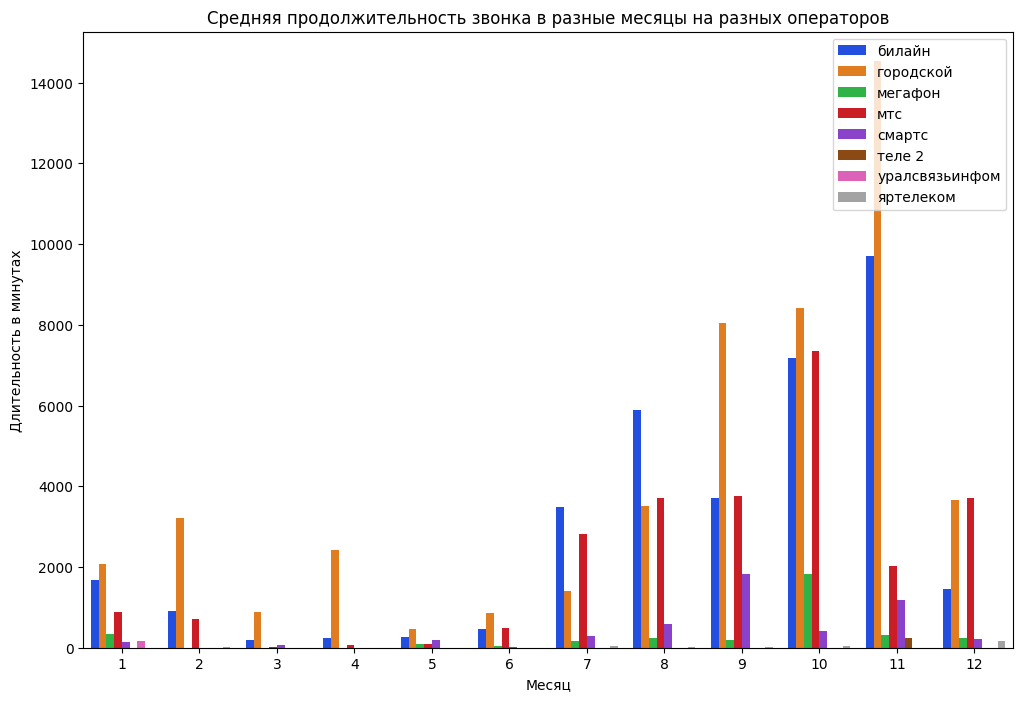

In [466]:
# Group the data by operator and month and calculate the mean duration for each combination
monthly_data = d_new.groupby(['operator', 'month'])['duration'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='duration', hue='operator', data=monthly_data, palette='bright')
plt.title('Средняя продолжительность звонка в разные месяцы на разных операторов')
plt.xlabel('Месяц')
plt.ylabel('Длительность в минутах')
plt.legend(loc='upper right')
plt.show();

In [451]:
m_data = d_new.groupby(['operator', 'month'])['duration'].sum()
m_data

operator   month
билайн     1        1679
           2         907
           3         195
           4         244
           5         255
                    ... 
яртелеком  7          33
           8          21
           9           6
           10         37
           12        174
Name: duration, Length: 64, dtype: int64

In [468]:
operators = ['билайн', 'городской', 'мегафон', 'мтс', 'смартс', 'теле 2', 'уралсвязьинфом', 'яртелеком']

df_operators = d_new[d_new['operator'].isin(operators)]

df_operators = d_new[d_new['operator'].isin(operators)].copy()
df_operators['year'] = pd.DatetimeIndex(df_operators['date_only']).year
grouped_data = df_operators.groupby(['operator', 'year'])['duration'].sum()

# преобразуем полученную группировку в сводную таблицу
sum_table = pd.pivot_table(grouped_data.reset_index(), values='duration', index=['year'], columns=['operator'])

sum_table

operator,билайн,городской,мегафон,мтс,смартс,теле 2,уралсвязьинфом,яртелеком
year,,,,,,,,
2010,35148,49508,3449,25660,4922,230,165,305


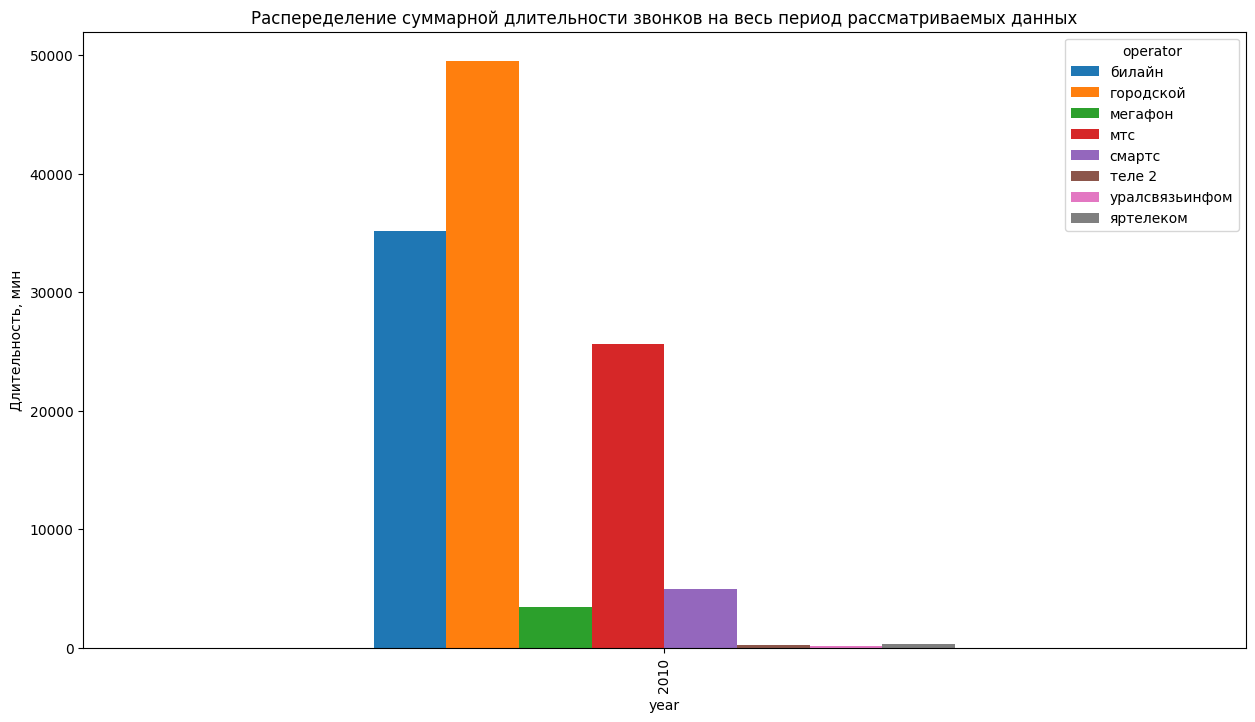

In [473]:
sum_table.plot(kind='bar', figsize=(15, 8))
plt.title('Распеределение суммарной длительности звонков на весь период рассматриваемых данных')
plt.ylabel('Длительность, мин')
plt.show()

### *Вывод:* Видим на гистограмме, что больше всего суммарно в год абонент совершает звонков на городской номер, билайн и мтс.

In [474]:
# создаем новый датафрейм, содержащий только нужных операторов

"""
'билайн',
'городской',
'мегафон',
'мтс',
'смартс',
'теле 2'
'уралсвязьинфом',
'яртелеком'

"""
operators = ['билайн',
'городской',
'мегафон',
'мтс',
'смартс',
'теле 2'
'уралсвязьинфом',
'яртелеком']

df_operators = d_new[d_new['operator'].isin(operators)]

# создаем сводную таблицу по операторам, месяцам и длительности звонков
table = pd.pivot_table(df_operators, values='duration', index=['month'], columns=['operator'], aggfunc=np.mean)

table

operator,билайн,городской,мегафон,мтс,смартс,яртелеком
month,,,,,,
1,1679.0,2076.0,341.0,888.0,132.0,NaN
2,907.0,3224.0,NaN,713.0,NaN,29.0
3,195.0,894.0,NaN,21.0,69.0,NaN
4,244.0,2411.0,NaN,79.0,NaN,NaN
5,255.0,473.0,81.0,91.0,198.0,5.0
6,471.0,872.0,54.0,487.0,10.0,NaN
7,3482.0,1407.0,168.0,2810.0,299.0,33.0
8,5884.0,3518.0,229.0,3720.0,584.0,21.0
9,3713.0,8035.0,192.0,3763.0,1817.0,6.0


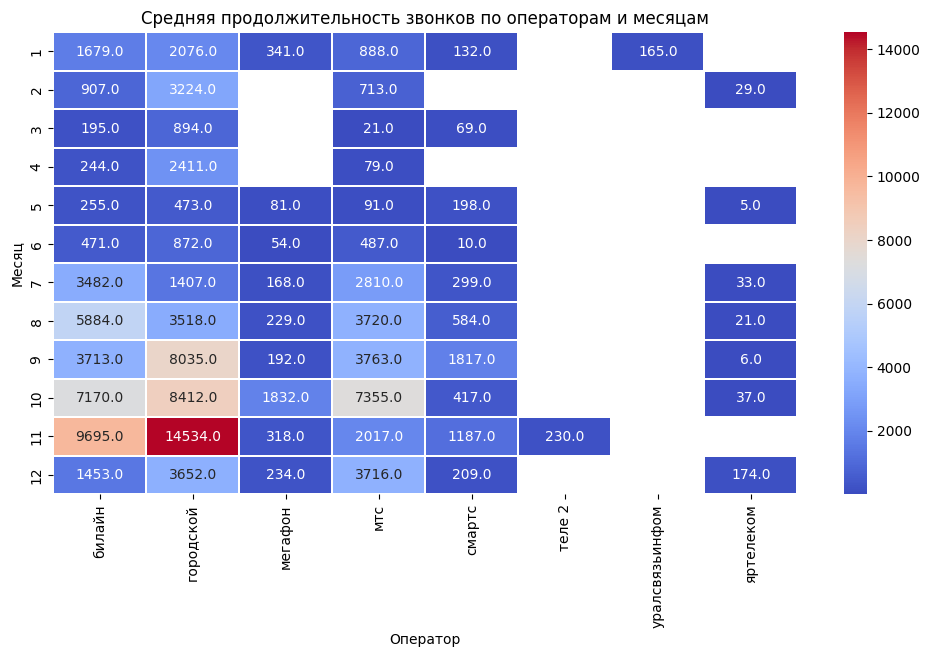

In [475]:
# pivot the table to have months as rows and operators as columns
pivot_table = d_new.pivot(index='month', columns='operator', values='duration')

# create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.3)

plt.title('Средняя продолжительность звонков по операторам и месяцам')
plt.xlabel('Оператор')
plt.ylabel('Месяц')

plt.show();

### *Вывод:* Исходные данные были обработаны, в том числе, был применен ресемплинг временного ряда, чтобы проанализировать динамику поведения абонента в течение месяца. Из анализа длительности звонков в месяц можно сделать вывод, что больше всего суммарно в год абонент совершает звонков на городской номер, билайн и мтс. Динамика в течение года показывает, что в ноябре абонент совершает самое большое количество звонков на городские номера. Однако, начиная с июля в течение года число звонков на мтс растет и к декабрю опережает билайн. При этом длительность звонков на городские номера сохраняет максимальную долю. Таким образом, абоненту можно посоветовать выбрать тариф МТС, который предполагает выгодные тарифы на городские номера.